In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.path as mpath
from matplotlib import rc
import matplotlib.pyplot as plt
import netCDF4 as nc 
import pandas as pd 
import xarray as xr
import seaborn as sns
import scipy
import dask
import h5py
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
from cycler import cycler
import cmocean
from matplotlib.colors import TwoSlopeNorm

np.random.seed(4321)
plt.rcParams.update({'font.size': 12})
print('all done')
%matplotlib inline
nanmasked = plt.get_cmap('RdBu').copy()
nanmasked.set_bad('black')
nanmasked2 = mpl.colors.LinearSegmentedColormap.from_list("", ["white","red"])
nanmasked2.set_bad('black')

all done


In [2]:
# data_path = '/scratch/gpfs/CDEUTSCH/wchu/CEFI-regional-MOM6/exps/NWA12.COBALT/OUTPUT/combined/19930101.ocean_daily_1993'_01.nc'
# dsnow = xr.open_dataset(data_path,chunks='auto')

# combining all the data between jan and nov
data_path = '/scratch/gpfs/CDEUTSCH/wchu/CEFI-regional-MOM6/exps/NWA12.COBALT/OUTPUT/combined/19930101.ocean_daily_budgets_1993_'
ds = xr.concat([xr.open_dataset(data_path+'{:02}'.format(i)+'.nc',chunks='auto') for i in range(1, 12)],dim='time')
ds = ds.rename({'xh_sub01': 'xh','yh_sub01': 'yh'})

ds.variables

Frozen({'volcello': <xarray.Variable (time: 334, z_l: 52, yh: 343, xh: 601)> Size: 14GB
dask.array<concatenate, shape=(334, 52, 343, 601), dtype=float32, chunksize=(3, 52, 343, 601), chunktype=numpy.ndarray>
Attributes:
    units:          m3
    long_name:      Ocean grid-cell volume
    cell_methods:   area:sum z_l:sum yh:sum xh:sum time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_volume, 'Th_tendency': <xarray.Variable (time: 334, z_l: 52, yh: 343, xh: 601)> Size: 14GB
dask.array<concatenate, shape=(334, 52, 343, 601), dtype=float32, chunksize=(3, 52, 343, 601), chunktype=numpy.ndarray>
Attributes:
    units:          W m-2
    long_name:      Net time tendency for heat
    cell_methods:   area:mean z_l:sum yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT, 'T_advection_xy': <xarray.Variable (time: 334, z_l: 52, yh: 343, xh: 601)> Size: 14GB
dask.array<concaten

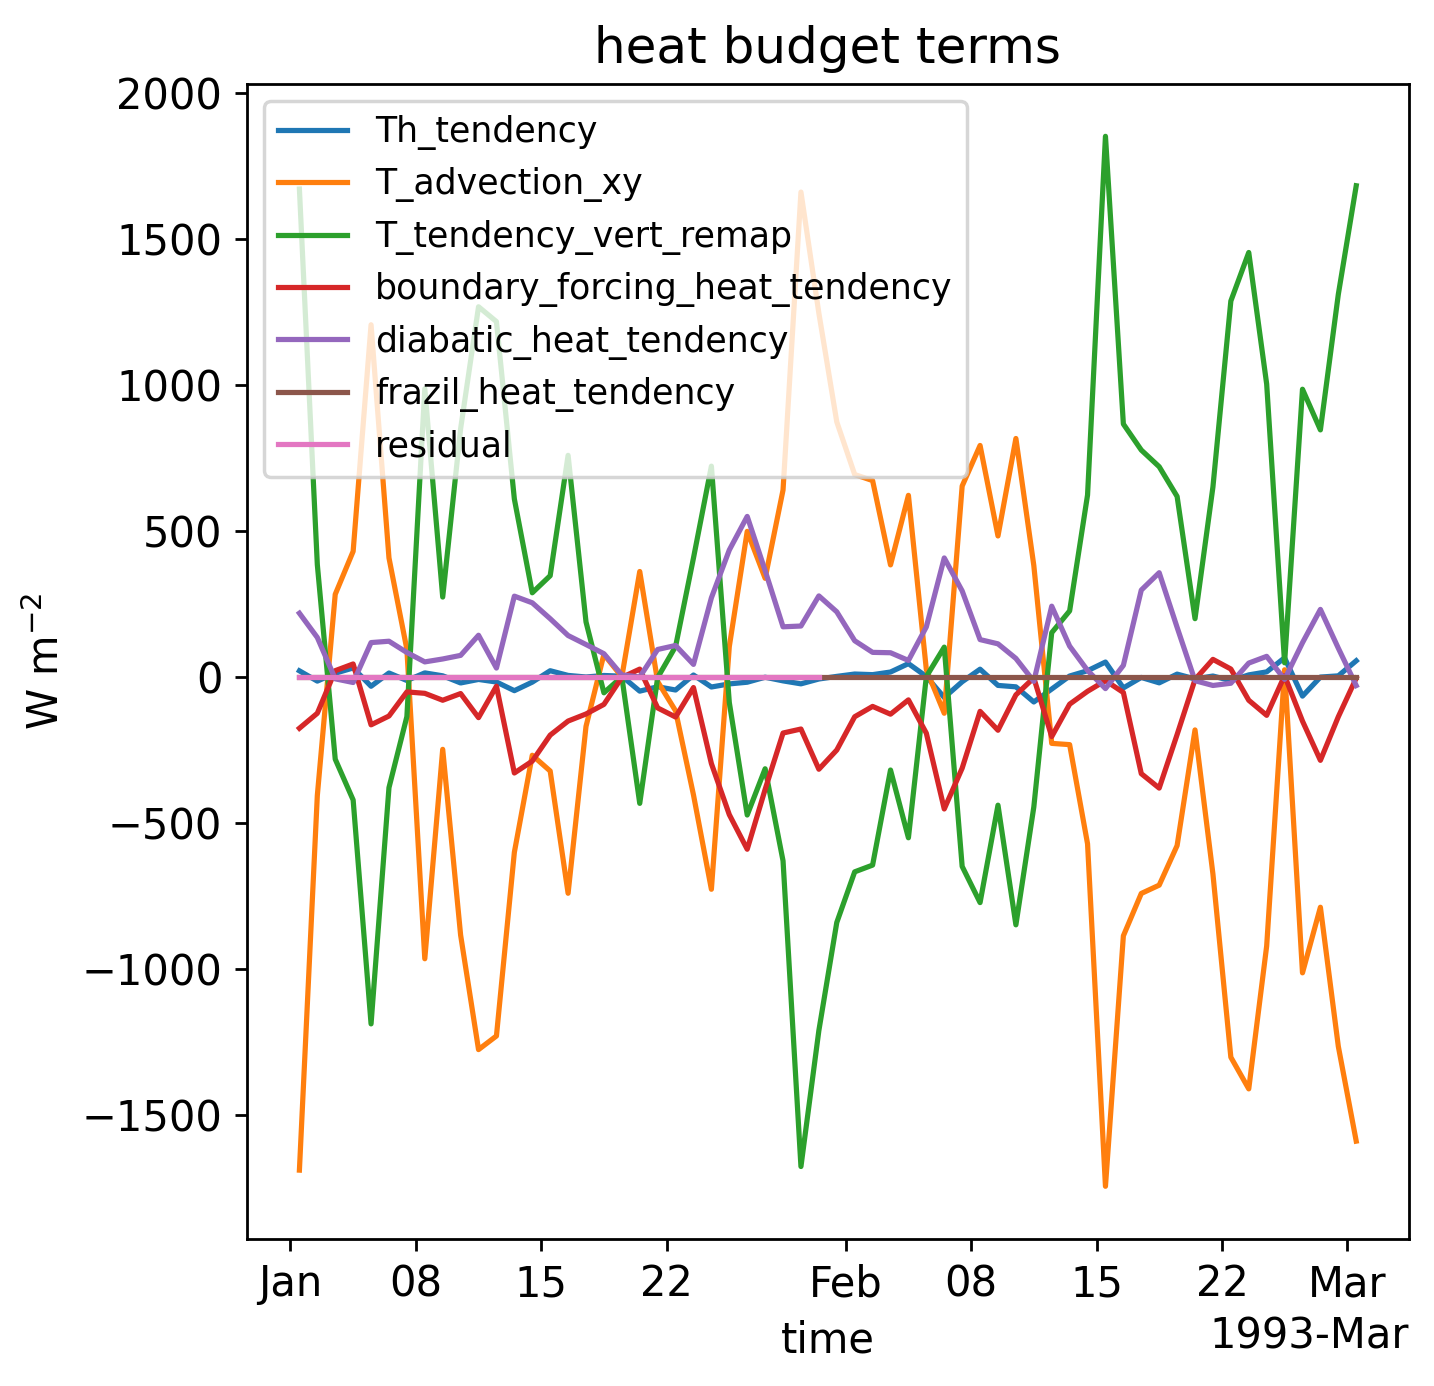

In [17]:
# terms = {}
# terms['heat'] = ['Th_tendency','T_advection_xy','T_tendency_vert_remap','boundary_forcing_heat_tendency','diabatic_heat_tendency','frazil_heat_tendency']

# # # cell-by-cell budget xh=50,yh=300,zl=20
# fluxes = ds.T_advection_xy.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).squeeze() + ds.T_tendency_vert_remap.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).squeeze() + ds.boundary_forcing_heat_tendency.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).squeeze() + ds.diabatic_heat_tendency.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).squeeze() + ds.frazil_heat_tendency.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).squeeze() 

# fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=250)
# fluxes.plot(x='time')
# ds.Th_tendency.isel(xh=50,yh=300,z_l=0,time=slice(0,30)).plot(x='time')
# diff = ds.Th_tendency.isel(xh=50,yh=300,z_l=0,time=slice(0,30)) - fluxes
# diff.plot(x='time')/

# ds.Th_tendency.isel(time=0,z_l=1).plot(x='xh',y='yh')
# ds.time[0]
# ax.set_ylabel('W m$^{-2}$')
# ax.set_title('heat budget')
# ax.legend(['heat tendency','heat fluxes', 'difference'])

fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=250)
for term in terms['heat']:
        ds[term].isel(xh=50,yh=300,z_l=0,time=slice(0,60)).plot(x='time')
diff.plot(x='time')
ax.set_ylabel('W m$^{-2}$')
ax.set_title('heat budget terms')
ax.legend(terms['heat']+['residual'],fontsize=10)

In [18]:
# %%timeit 
# nanmasked = plt.get_cmap('cmo.tempo').copy()
# nanmasked.set_bad('black')
# plt.rcParams.update({'font.size': 8})
# day = 180
# fig, ax = plt.subplots(1, 1,figsize=(6,3),dpi=175)
# test = ds.o2min.isel(z_l=0).mean('time')*1e6
# test.plot(x='xh',y='yh',cmap = nanmasked,cbar_kwargs={'label':'o2 [$\mu$mol/kg]'})
# plt.tight_layout()
# plt.gca().set_aspect('equal')
# ax.set_title('mean daily min o2')
# # ax.set_title(label='Date: ' + ds.time[day].dt.strftime('%Y-%m-%d').values)# + '  Depth: ' + str(dspo2.z_l[0].values) + ' m')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')

# # list(ds.keys())
# plt.rcParams.update({'font.size': 12})
# ds.o2min.isel(time=slice(100,270),xh=600,yh=40,z_l=20).plot(x='time',color='lightsteelblue')
# ds.o2max.isel(time=slice(100,270),xh=600,yh=40,z_l=20).plot(x='time',color='lightcoral')
# ds.o2.isel(time=slice(100,270),xh=600,yh=40,z_l=20).plot(x='time',color='black')